# [Problem Set 1](https://docs.google.com/document/d/13CJgtDr8kIX9KIrs6BYFDF6-N7cfAyX0R54v8CWoqmQ/pub) solutions

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from hough_transforms import *

# Question 1
- edge detect

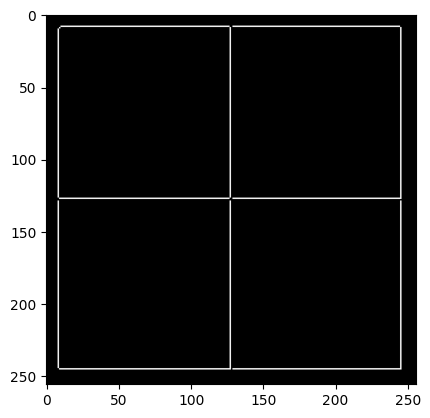

In [5]:
img = cv2.imread('input/ps1-input0.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray, 100, 200)
cv2.imwrite('output/ps1-1-a-1.png', edges)
plt.imshow(edges, cmap='gray')


# Question 2
- Hough line transform
- Find hough peaks
- draw lines corresponding to the peaks

True

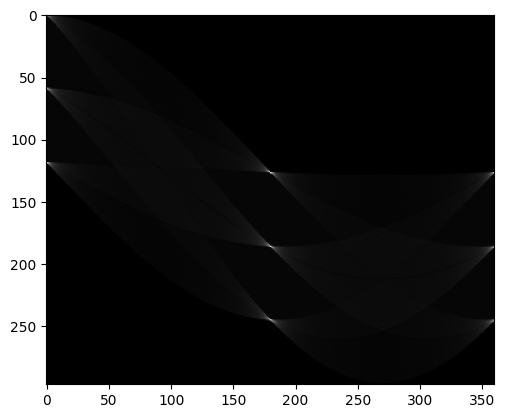

In [6]:
results = hough_lines_acc(edges, RhoResolution=2, Theta=np.arange(-90,90,0.5))
H = results['H']
theta = results['theta']
rho = results['rho']

H_save = (H/H.max()*255).astype(np.uint8)
plt.imshow(H_save,cmap='gray')
cv2.imwrite('output/ps1-2-a-1.png', H_save) 

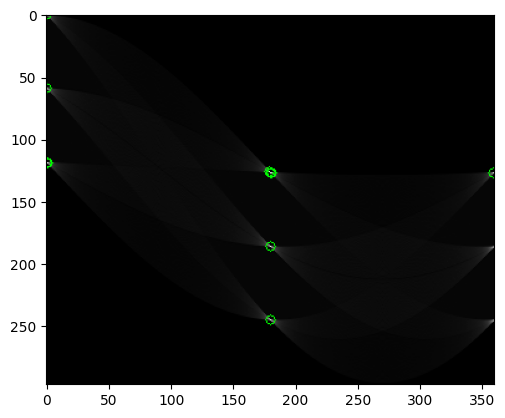

In [7]:
peaks = hough_peaks(H, 10)
H_highlight = hough_peaks_highlight(H, peaks)


cv2.imwrite('output/ps1-2-b-1.png', H_highlight)
plt.imshow(H_highlight)

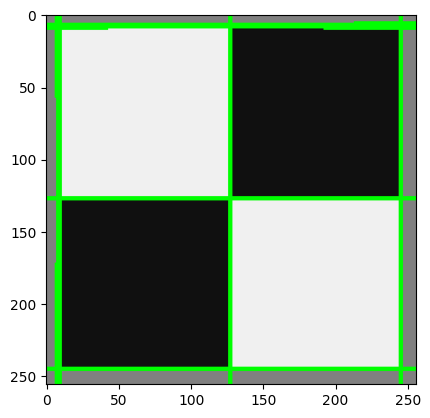

In [8]:
ds = rho[peaks[:, 0]]
ts = theta[peaks[:, 1]]
result = hough_lines_draw(img_gray, ds, ts)
cv2.imwrite('output/ps1-2-c-1.png', result)
plt.imshow(result)

# Question 3
- Gaussian blur to smoothen noise
- edge detect with and without smoothening
- hough line detect after smoothening

In [9]:
noisy = cv2.imread('input/ps1-input0-noise.png')
noisy_gray = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)
filtered_gray = cv2.GaussianBlur(noisy, (5,5), sigmaX=3)
cv2.imwrite('output/ps1-3-a-1.png', filtered_gray)

edges_w_noise = cv2.Canny(noisy_gray, 100, 200)
edges_wo_noise = cv2.Canny(filtered_gray, 100, 200)
cv2.imwrite('output/ps1-3-b-1.png', edges_w_noise)
cv2.imwrite('output/ps1-3-b-2.png', edges_wo_noise)

True

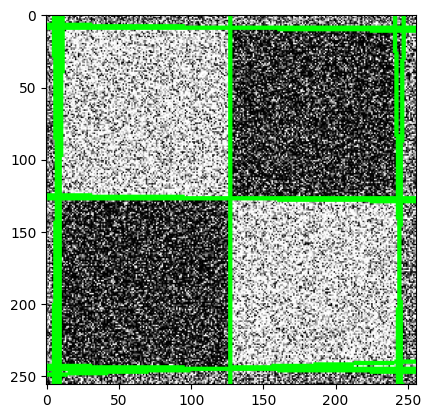

In [10]:
results = hough_lines_acc(edges_wo_noise, RhoResolution=2, Theta=np.arange(-90, 89, 1))
H = results['H']
theta = results['theta']
rho = results['rho']

peaks = hough_peaks(H, 15)

H_highlight = hough_peaks_highlight(H, peaks)

cv2.imwrite('output/ps1-3-c-1.png', H_highlight)

ds = rho[peaks[:,0]]
ts = theta[peaks[:,1]]
result = hough_lines_draw(noisy_gray, ds, ts)
cv2.imwrite('output/ps1-3-c-2.png', result)
plt.imshow(result)


# Question 4
same as Q3, but using a more difficult image

True

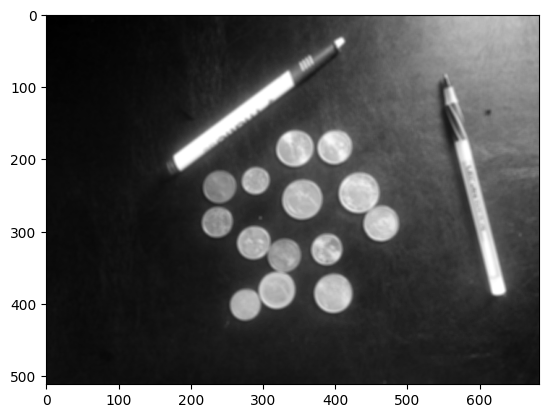

In [11]:
img = cv2.imread('input/ps1-input1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (5,5), sigmaX=3)
plt.imshow(img_gray, cmap='gray')
cv2.imwrite('output/ps1-4-a-1.png', img_gray)

edges = cv2.Canny(img_gray, 100, 200)
cv2.imwrite('output/ps1-4-b-1.png', edges)

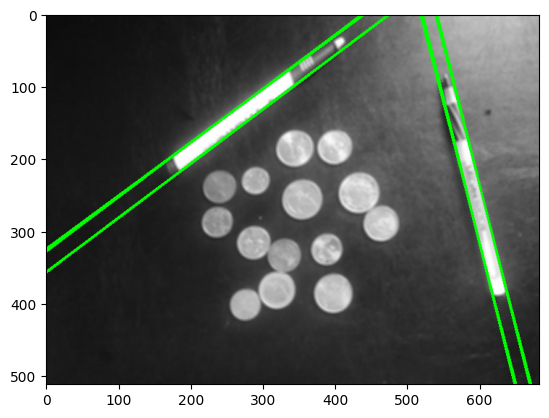

In [12]:
results = hough_lines_acc(edges)
H = results['H']
theta = results['theta']
rho = results['rho']

peaks = hough_peaks(H, 10)

H_highlight = hough_peaks_highlight(H, peaks)

cv2.imwrite('output/ps1-4-c-1.png', H_highlight)

ds = rho[peaks[:,0]]
ts = theta[peaks[:,1]]
result = hough_lines_draw(img_gray, ds, ts)
cv2.imwrite('output/ps1-4-c-2.png', result)
plt.imshow(result)


# Question 5
- hough circle transform
- known/unknown radius

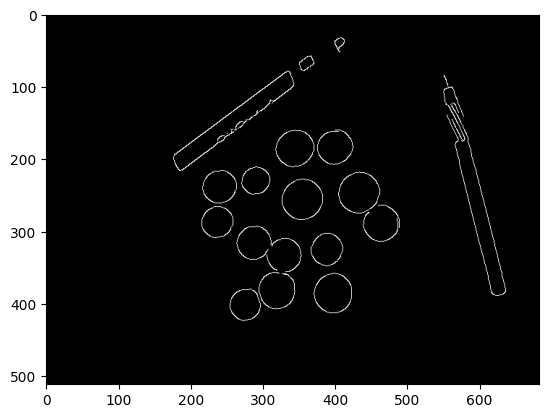

In [13]:
img = cv2.imread('input/ps1-input1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (5,5), sigmaX=3)
cv2.imwrite('output/ps1-5-a-1.png', img_gray)
edges = cv2.Canny(img_gray, 100, 200)
cv2.imwrite('output/ps1-5-a-2.png', edges)
plt.imshow(edges, cmap='gray')

(512, 683, 3)


True

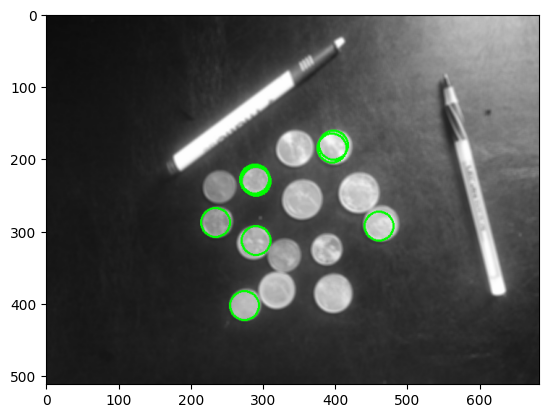

In [14]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
theta = np.arctan2(sobel_y, sobel_x)

radius = 20
H = hough_circles_acc(edges, theta, radius)

peaks = hough_peaks(H, 10)

result = hough_circles_draw(img_gray, peaks, radius)
print(result.shape)

plt.imshow(result)
cv2.imwrite('output/ps1-5-a-3.png', result)


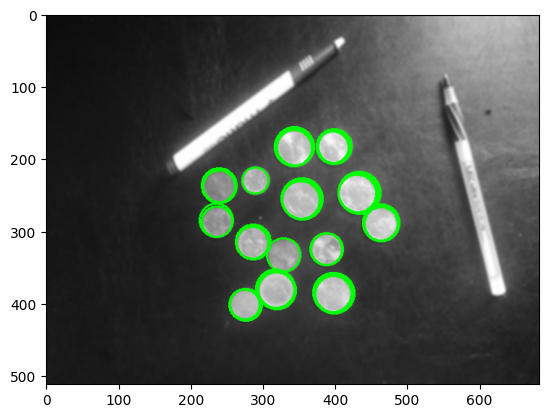

In [15]:
C, H = find_circles(edges, theta, (10,50), 50)

result = hough_circles_draw(img_gray, C[:,:-1], C[:,-1])
cv2.imwrite('output/ps1-5-b-1.png', result)
plt.imshow(result)


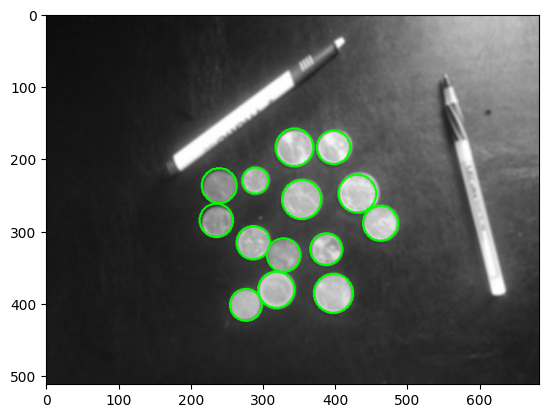

In [16]:
C, H = find_circles2(edges, theta, vote_threshold=0.5, radius_range=(10,50))

result = hough_circles_draw(img_gray, C[:,:-1], C[:,-1])
plt.imshow(result)

# Question 6
- find the line along the pens in a clutter image
- refine the detected lines

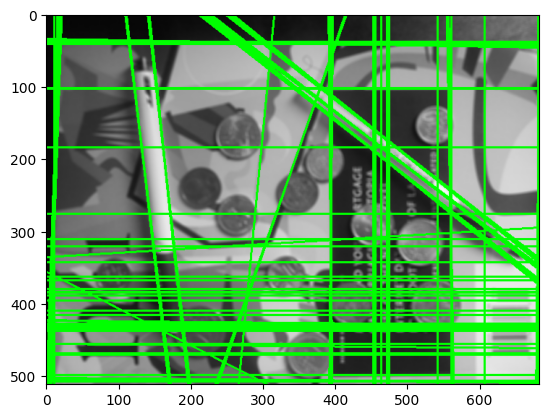

In [17]:
img = cv2.imread('input/ps1-input2.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (5,5), sigmaX=5)

edges = cv2.Canny(img_gray, 20, 150)

results = hough_lines_acc(edges, RhoResolution=0.5)
H = results['H']
theta = results['theta']
rho = results['rho']

peaks = hough_peaks(H, 100)

ds = rho[peaks[:,0]]
ts = theta[peaks[:,1]]
result = hough_lines_draw(img_gray, ds, ts)
cv2.imwrite('output/ps1-6-a-1.png', result)
plt.imshow(result)



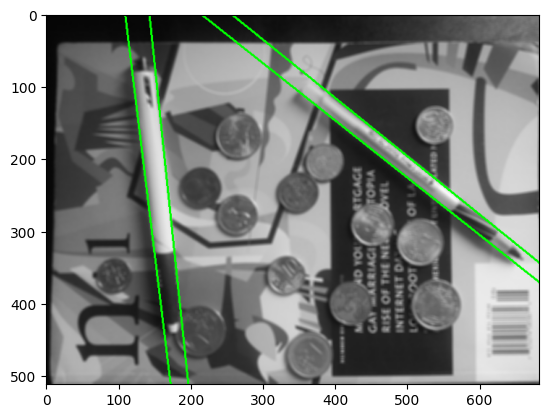

In [18]:
lines = refine_lines(edges, H, rho, theta, parallel_relax=10, pen_width=30)
result = hough_lines_draw(img_gray, lines[:,0], lines[:,1])
cv2.imwrite('output/ps1-6-c-1.png', result)
plt.imshow(result)

# Question 7
- find circles in a clutter image

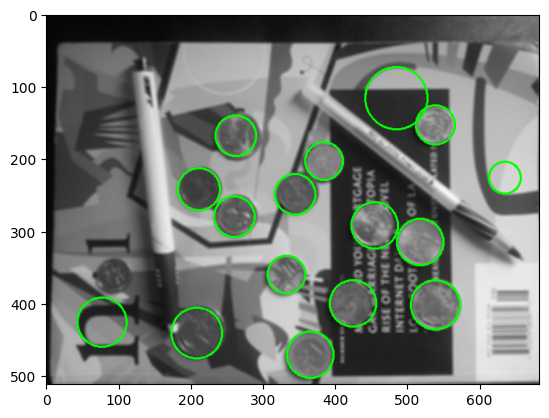

In [19]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
gradient_theta = np.arctan2(sobel_y, sobel_x)

C, H = find_circles2(edges, gradient_theta,
                     vote_threshold=0.3, 
                     nms_threshold=30,
                     radius_range=(10, 50))

result = hough_circles_draw(img_gray, C[:, :-1], C[:, -1])
plt.imshow(result)


(13, 3)


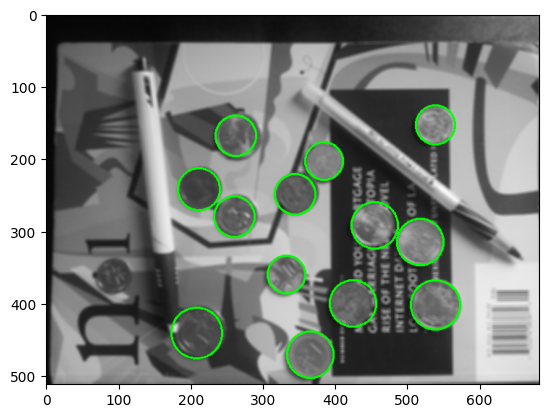

In [21]:
C_refined = refine_circles(edges, C, overlay_thres=0.15, contain_thres=300)
print(C_refined.shape)
result = hough_circles_draw(img_gray, C_refined[:, :-1], C_refined[:, -1])
plt.imshow(result)
    

# Question 8
- detect line and circle in distorted image

True

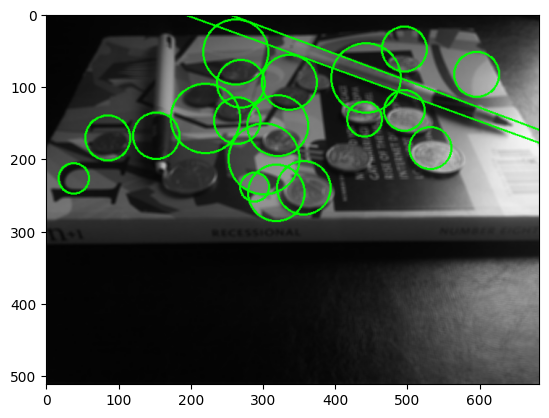

In [22]:
img = cv2.imread('input/ps1-input3.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (5,5), sigmaX=5)

edges = cv2.Canny(img_gray, 20, 100)

results = hough_lines_acc(edges, RhoResolution=0.5)
H = results['H']
theta = results['theta']
rho = results['rho']

lines = refine_lines(edges, H, rho, theta, initial_peaks=100, parallel_relax=10, pen_width=25, min_length=140)

sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
gradient_theta = np.arctan2(sobel_y, sobel_x)

C, H = find_circles2(edges, gradient_theta,
                     vote_threshold=0.6, 
                     nms_threshold=30,
                     radius_range=(20, 50))
C_refined = refine_circles(edges, C, overlay_thres=0.15, contain_thres=200)

result = img_gray
if len(lines) != 0:
  result = hough_lines_draw(img_gray, lines[:,0], lines[:,1])
if len(C_refined) != 0:
  result = hough_circles_draw(result, C[:, :-1], C[:, -1])
plt.imshow(result)
cv2.imwrite('output/ps1-8-a-1.png', result)

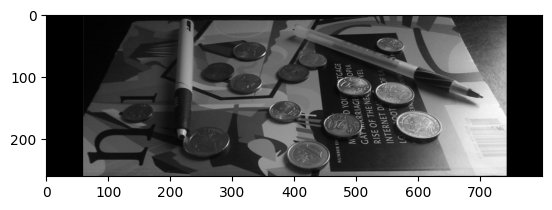

In [23]:
img = cv2.imread('input/ps1-input3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

h,w = img.shape
padded = np.zeros([260, 800])
padded[:, 60:60+w] = img[20:280,:]

plt.imshow(padded, cmap='gray')

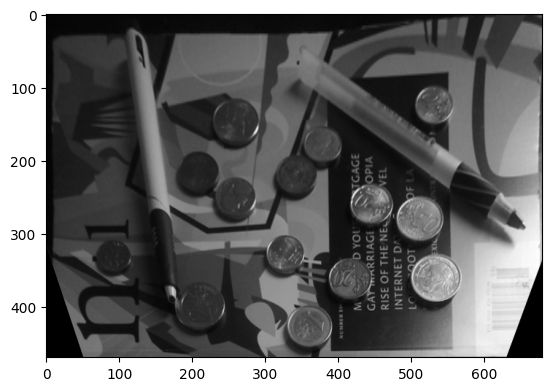

In [24]:
book_height = 470
book_width = 680
points_before = np.array([
  [139,0],
  [649,0],
  [0,259],
  [799,259]]).astype(np.float32)

points_after = np.array([
  [0,0],
  [book_width-1,0],
  [0,book_height-1],
  [book_width-1, book_height-1]]).astype(np.float32)

M = cv2.getPerspectiveTransform(points_before, points_after)
img_straight = cv2.warpPerspective(padded, M, (book_width, book_height))
plt.imshow(img_straight, cmap='gray')

True

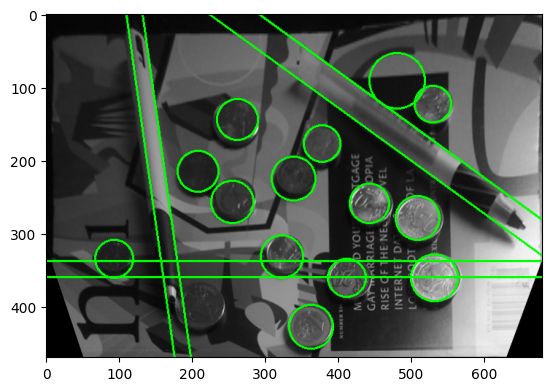

In [25]:
img_straight = img_straight.astype(np.uint8)
img_straight_blur = cv2.GaussianBlur(img_straight, (5,5), sigmaX=5)
edges = cv2.Canny(img_straight_blur, 20, 100)

results = hough_lines_acc(edges, RhoResolution=0.5)
H = results['H']
theta = results['theta']
rho = results['rho']

lines1 = refine_lines(edges, H, rho, theta, initial_peaks=100, parallel_relax=10, pen_width=20, min_length=200)
lines2 = refine_lines(edges, H, rho, theta, initial_peaks=100, parallel_relax=10, pen_width=35, min_length=200)
lines = np.concatenate((lines1, lines2), axis=0)

sobel_x = cv2.Sobel(img_straight, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_straight, cv2.CV_64F, 0, 1, ksize=5)
gradient_theta = np.arctan2(sobel_y, sobel_x)

C, H = find_circles2(edges, gradient_theta,
                     vote_threshold=0.35, 
                     nms_threshold=30,
                     radius_range=(20, 50))
C_refined = refine_circles(edges, C, overlay_thres=0.15, contain_thres=350)

result = img_gray
if len(lines) != 0:
  result = hough_lines_draw(img_straight, lines[:,0], lines[:,1])
if len(C_refined) != 0:
  result = hough_circles_draw(result, C_refined[:, :-1], C_refined[:, -1])
plt.imshow(result)
cv2.imwrite('output/ps1-8-c-1.png', result)

